In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)
np.set_printoptions(threshold=np.inf)


In [2]:
import sqlite3

In [4]:
import os

for dirname, _, filenames in os.walk("C:/Users/benno/OneDrive/Data/Kaggle/Soccer/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/benno/OneDrive/Data/Kaggle/Soccer/database.sqlite


In [806]:
database = "C:/Users/benno/OneDrive/Data/Kaggle/Soccer/database.sqlite"

conn = sqlite3.connect(database)

tables = pd.read_sql(""" SELECT * FROM sqlite_master WHERE type='table';""", conn)



In [8]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [70]:
team_attrs[:10]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,Organised,45,Normal,35,Normal,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [64]:
cols = ["buildUpPlaySpeed", 
        # "buildUpPlayDribbling", 
        "buildUpPlayPassing", "chanceCreationPassing", 
        "chanceCreationCrossing", 
        "chanceCreationShooting",
        "defencePressure", "defenceAggression", "defenceTeamWidth" ]

In [43]:
cols = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing" ]

In [61]:
cols = ["buildUpPlaySpeed", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting",]

In [51]:
def star_chart(soccer_dataset, idx):
    samp = soccer_dataset[cols].iloc[idx, ::]
    samp1 = pd.DataFrame(samp).reset_index().rename(columns={"index": "dim", idx: "score"})
    return px.line_polar(samp1, r="score", theta="dim", line_close=True)

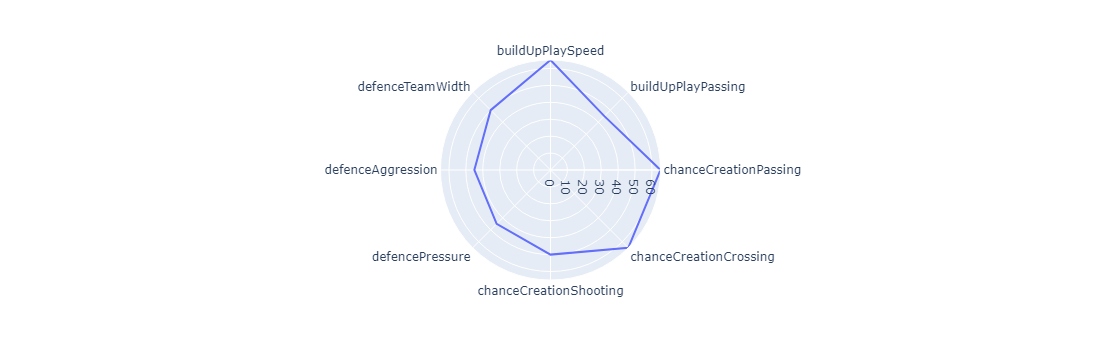

In [67]:
star_chart(team_attrs, 10)

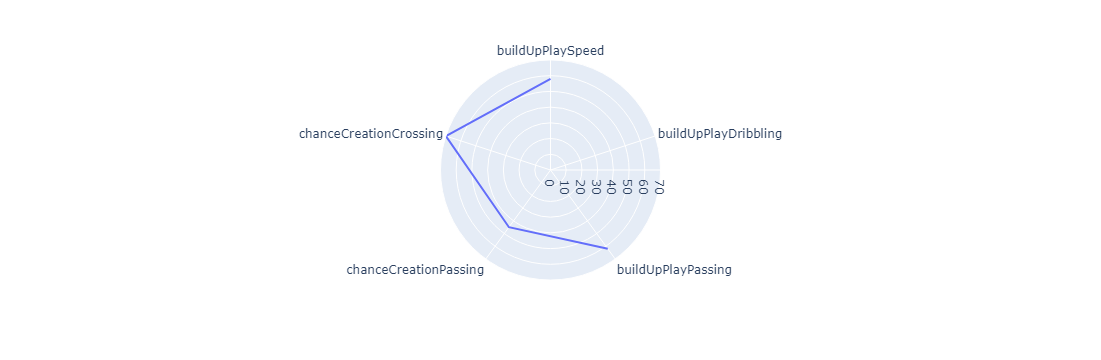

In [49]:
samp = team_attrs[cols].iloc[5, ::]
samp1 = pd.DataFrame(samp).reset_index().rename(columns={"index": "dim", 5: "score"})
px.line_polar(samp1, r="score", theta="dim", line_close=True)

In [436]:
league = pd.read_sql(""" SELECT * FROM league; """, conn)
league[:5]

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [437]:
country = pd.read_sql(""" SELECT * FROM country; """, conn)
country[:5]

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [171]:
# team = pd.read_sql(""" SELECT * FROM team_attributes JOIN team ON team_attributes.team_api_id = team.team_api_id; """, conn)
# # team.dtypes

In [402]:
# match = pd.read_sql(""" SELECT * FROM match JOIN team_attributes ON team_attributes.team_api_id = match.home_team_api_id JOIN team ON team.team_api_id = match.home_team_api_id; """, conn)
# match[:5]

In [184]:
# the tables in question
team_attr = pd.read_sql(""" SELECT * FROM team_attributes; """, conn)
team_name = pd.read_sql(""" SELECT * FROM team; """, conn)
match = pd.read_sql(""" SELECT * FROM match; """, conn)

In [809]:
# investigate for below cell:
# team_attr[:5] # team_api_id -> 299 unique values.
match[-10:] #home_team_api_id
# team_attr[:5] # team_api_id -> 288 unique values. ->>>> we can only have 288 rows.


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25969,25970,24558,24558,2015/2016,8,2015-09-12 00:00:00,1992086,9931,10190,2,1,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,5.0,2.0,4.0,6.0,8.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,8.0,8.0,8.0,8.0,11.0,156175.0,95216.0,172768.0,22834.0,30835.0,339992.0,114738.0,176206.0,34035.0,40274.0,23148.0,42231.0,678384.0,638592.0,67363.0,413155.0,45780.0,143790.0,66934.0,176298.0,92094.0,72628.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,25971,24558,24558,2015/2016,8,2015-09-12 00:00:00,1992087,10192,9824,4,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,274787.0,492132.0,108451.0,25815.0,94553.0,384376.0,598355.0,320184.0,45174.0,71764.0,302079.0,33272.0,114735.0,25813.0,41621.0,358156.0,114011.0,42237.0,56868.0,209371.0,531309.0,113227.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,25972,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992088,10199,9956,3,3,1.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42276.0,27232.0,178119.0,150007.0,42294.0,73977.0,114792.0,201704.0,36382.0,104646.0,34082.0,132814.0,274779.0,155075.0,294256.0,42258.0,173936.0,39979.0,147959.0,451983.0,80564.0,289472.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,25973,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992089,10243,10191,3,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,274776.0,451982.0,34268.0,197757.0,121080.0,462608.0,67008.0,632356.0,198082.0,194532.0,42262.0,67311.0,8800.0,320183.0,67304.0,67389.0,133126.0,186524.0,93223.0,121115.0,25809.0,289732.0,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25973,25974,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992090,10179,7896,3,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,8.0,8.0,10.0,10.0,10.0,10637.0,67349.0,202663.0,3259

In [301]:
# are those 288 values in the 299 values?
newteams = []
for j in team_name["team_api_id"].values:
    if j in team_attr["team_api_id"].values:
        newteams.append(j)

# yes they are.
len(newteams)

288

In [255]:
# columns we want are:
team_attr["team_api_id"]
team_name["team_api_id"]
match["home_team_api_id"]

In [188]:
# lengths are:
len(team_attr),len(team_name), len(match)

(1458, 299, 25979)

In [311]:
# # how many uniques, from "team attribute id" should be in the final dataframe
# summary_dataframe_small(team_attr) # 288 -> the values for our polar coordinates chart
# summary_dataframe_small(team_name) # 299 -> the name
# summary_dataframe_small(match)     # 299 -> the wins/losses

# # 288, as we need those y values

In [ ]:
# merge

In [ ]:
# check uniques for team_api_id
# team ttr
# team name
# team 3

In [312]:
# merge the team datasets, finish with 288 unique values that have team_api_id and team_name

In [302]:
team2 = team_attr.merge(team_name, on="team_api_id")

In [307]:
# just the most recent data
team3 = team2.drop_duplicates("team_api_id", keep="last")
len(team3)

288

In [ ]:
# there are multiple team ID 
# looks like entries are from different points in time # RED FLAG
### -> solved

In [ ]:
# successful merge

In [309]:
len(team3) # only want these rows

288

In [310]:
len(match) # best way to aggregate all this data? -> just the most recent

25979

In [ ]:
# take only the results from the last season [avoid too much averaging; less interesting data]
# -> 3326
# actually take only the most recent game.
# -> 
# then groupby, as different teams may have played different amounts of games
# -

In [349]:
# first select by 2015/2016 [practice]
# then only keep most recent -> it's a chance dashboard, and it's more fun to see an **actual** score, vs 1.33

mask_match = ( match["season"] == "2014/2015" )
match2 = match[mask_match]
print(len(match2))
len(match2["away_team_api_id"].unique())

3325


188

In [ ]:
# looks like there's only 188 unique teams that played in the most recent season
# this is the same for home and away
# -> let's examine the 2014/2015 season 
# see above cell

In [423]:
# above is fine: now let's add in country and league_id
league[:5] # merge on league["country_id"], keep ["name"]
country[:5] # merge on country["id"], keep ["name"]
match2[:5] # eventually merge on ["country_id"]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1248,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,20747.0,26631.0,277848.0,171338.0,33620.0,148335.0,449276.0,447455.0,104389.0,25957.0,306117.0,214340.0,110878.0,280083.0,33605.0,46458.0,166679.0,239599.0,179059.0,521204.0,240478.0,97699.0,None,None,None,None,None,None,None,None,1.36,4.75,8.50,1.35,4.60,7.00,1.35,4.2,7.5,1.30,5.0,9.50,1.41,4.98,8.19,1.36,4.5,7.50,1.36,4.80,7.00,1.33,4.8,8.00,NaN,NaN,NaN,NaN,NaN,NaN
1249,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,2,1.0,1.0,3.0,5.0,7.0,9.0,3.0,5.0,7.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,208699.0,37963.0,208348.0,38339.0,26606.0,8930.0,32760.0,104410.0,104411.0,80592.0,78902.0,185644.0,277771.0,445873.0,209922.0,178293.0,179310.0,26440.0,39962.0,14557.0,465726.0,259507.0,None,None,None,None,None,None,None,None,4.20,3.60,1.83,4.00,3.40,1.80,4.00,3.2,1.8,4.33,3.6,1.72,4.45,3.73,1.86,4.00,3.4,1.83,4.33,3.40,1.83,4.20,3.6,1.80,NaN,NaN,NaN,NaN,NaN,NaN
1250,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,1.0,3.0,5.0,7.0,9.0,3.0,5.0,7.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,1.0,3.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,67949.0,38789.0,38337.0,466443.0,202471.0,150240.0,111194.0,178165.0,209855.0,33662.0,231006.0,181069.0,346142.0,97359.0,149279.0,186621.0,39625.0,280443.0,208929.0,40521.0,79247.0,289248.0,None,None,None,None,None,None,None,None,3.60,3.50,2.00,3.60,3.25,1.95,3.60,3.2,1.9,3.60,3.3,1.95,3.95,3.63,1.99,3.40,3.4,2.00,3.80,3.30,1.95,3.75,3.5,1.95,NaN,NaN,NaN,NaN,NaN,NaN
1251,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,8.0,5.0,2.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,9.0,7.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,270473.0,426892.0,178486.0,513810.0,532766.0,210423.0,181071.0,389202.0,149258.0,36863.0,286117.0,107806.0,36832.0,134233.0,149334.0,39859.0,131531.0,201811.0,38365.0,45490.0,265123.0,148329.0,None,None,None,None,None,None,None,None,2.40,3.20,3.00,2.35,3.20,2.80,2.40,3.1,2.7,2.37,3.1,2.90,2.46,3.30,3.12,2.38,3.2,2.80,2.38,3.20,2.88,2.38,3.2,2.90,NaN,NaN,NaN,NaN,NaN,NaN
1252,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,

In [438]:
country = country.rename(columns={"name": "country_name", "id": "country_id"})
league = league.rename(columns={"name": "league_name"})
league[:5]

,id,country_id,league_name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [429]:
len(league)

11

In [469]:
c_l_names = league.merge(country, how="inner",  on=["country_id"])

In [470]:
len(c_l_names["country_id"].unique())

11

In [471]:
len(c_l_names["country_id"])

11

In [472]:
c_l_names2 = c_l_names.drop(["id"], axis=1)

In [473]:
c_l_names2[:5] # merge on country_id

,country_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy


In [474]:
len(c_l_names2)

11

In [505]:
match2[:5] # merge on league_id

In [508]:
match2["country_id"].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [503]:
c_l_names2["country_id"].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [509]:
# it seems counterintuitive to merge Country with Match, as there could be UEFA or inter-national matches. But Team does not have the country attribute.

match3 = match2.merge(c_l_names2, how="left", left_on="country_id", right_on="country_id")

In [512]:
len(match3["league_name"].unique())

11

In [513]:
len(match3["country_name"].unique())

11

In [ ]:
# done merging country and league with match

In [491]:
# now merge the team3 with it match
## -> problem: two teams per match
## -> answer: the final chart has two polarcoords, so let's make one home and one away; therefore, we can just make two dataframes, one home and one away

In [516]:
match4_home = match3.drop_duplicates(subset="home_team_api_id", keep="last")
match4_away = match3.drop_duplicates(subset="away_team_api_id", keep="last")

len(match4_home)
len(match4_away)

188

In [517]:
team1415_home = match4_home.merge(team3, how='left', left_on=['home_team_api_id'], right_on=['team_api_id'])

In [518]:
team1415_away = match4_away.merge(team3, how='left', left_on=['away_team_api_id'], right_on=['team_api_id'])

In [519]:
len(team1415_away), len(team1415_home)

(188, 188)

In [521]:
len(team1415_home["team_long_name"].unique()), len(team1415_away["team_long_name"].unique())

(188, 188)

In [ ]:
# check to make sure the home teams and away teams correctly match the team names

In [ ]:
# now: simplifym then nans...

In [374]:
len(team1415_home) # 188 teams
len(team1415_away) # 188 teams

188

In [376]:
team1415_home[:3].columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date_x',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'id_y', 'team_fifa_api_id_y', 'team_long_name', 'team_short_name'],
      dtype='object', length=144)

In [778]:
cols_home = ["home_team_api_id", "home_team_goal", "away_team_goal", "team_long_name", "team_short_name", "country_name", "league_name", "country_id", "league_id", "match_api_id", 
             "buildUpPlaySpeedClass", "buildUpPlayDribblingClass",  "buildUpPlayPassingClass","buildUpPlayPositioningClass", "chanceCreationCrossingClass", "chanceCreationShootingClass", "chanceCreationPositioningClass", "chanceCreationPassingClass","defencePressureClass","defenceAggressionClass","defenceTeamWidthClass", 
             "buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing",  "chanceCreationPassing",  "chanceCreationCrossing", "chanceCreationShooting",  "defencePressure",  "defenceAggression",  "defenceTeamWidth",  ]

cols_away= ["away_team_api_id", "away_team_goal", "home_team_goal", "team_long_name", "team_short_name", "country_name", "league_name", "country_id", "league_id", "match_api_id", 
             "buildUpPlaySpeedClass", "buildUpPlayDribblingClass",  "buildUpPlayPassingClass","buildUpPlayPositioningClass", "chanceCreationCrossingClass", "chanceCreationShootingClass", "chanceCreationPositioningClass", "chanceCreationPassingClass","defencePressureClass","defenceAggressionClass","defenceTeamWidthClass", 
             "buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing",  "chanceCreationPassing",  "chanceCreationCrossing", "chanceCreationShooting",  "defencePressure",  "defenceAggression",  "defenceTeamWidth",  ]


In [779]:
soccer_h = team1415_home[cols_home]
soccer_a = team1415_away[cols_away]

In [780]:
# simplifed in "chanceCreationCrossing" columns
# nan present
summary_dataframe_small(soccer_a)

,features,dtypes,nulls,nonnuls / 1.0,uniques
0,away_team_api_id,int64,0,1.000000,188
1,away_team_goal,int64,0,1.000000,6
2,home_team_goal,int64,0,1.000000,8
3,team_long_name,object,0,1.000000,188
4,team_short_name,object,0,1.000000,173
5,country_name,object,0,1.000000,11
6,league_name,object,0,1.000000,11
7,country_id,int64,0,1.000000,11
8,league_id,int64,0,1.000000,11
9,match_api_id,int64,0,1.000000,188


In [781]:
# how to fill this nan?
# 1. mean of multiple columns
    # 1. mean of the same team?
    # 2. mean of teams with similar stats?
        # same league, same class for similar columns, same bucket for similar columns

In [782]:
mask_nan1 = ( soccer_a["buildUpPlayDribbling"].isnull() )
soccer_a[mask_nan1]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
126,8020,3,0,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722162,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,NaN,38,36,33,53,53,54,55


In [783]:
mask_nan2 = ( soccer_a["away_team_api_id"]==8020 )
soccer_a[mask_nan2]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
126,8020,3,0,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722162,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,NaN,38,36,33,53,53,54,55


In [784]:
mask_nan1 = ( soccer_h["buildUpPlayDribbling"].isnull() )
soccer_h[mask_nan1]

,home_team_api_id,home_team_goal,away_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
117,8020,1,2,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722153,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,NaN,38,36,33,53,53,54,55


In [785]:
mask_nan2 = ( soccer_h["home_team_api_id"]==8020 )
soccer_h[mask_nan2]

,home_team_api_id,home_team_goal,away_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
117,8020,1,2,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722153,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,NaN,38,36,33,53,53,54,55


In [786]:
# actually might just be able to use a "not as recent" scoring metric, which in my view is more accurate than taking the means of numbers this club was never associated with.
# no such luck. older dates are also blank.
team2[team2["team_api_id"]==8020]

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
522,523,111429,8020,2010-02-22 00:00:00,30,Slow,NaN,Little,50,Mixed,Organised,45,Normal,35,Normal,70,Lots,Organised,60,Medium,70,Double,55,Normal,Cover,31445,111429.0,Polonia Bytom,GOR
523,524,111429,8020,2011-02-22 00:00:00,46,Balanced,NaN,Little,38,Mixed,Organised,36,Normal,33,Little,53,Normal,Organised,53,Medium,54,Press,55,Normal,Cover,31445,111429.0,Polonia Bytom,GOR


In [787]:
# all columns
cat_cols = ["league_name", "buildUpPlaySpeedClass", "buildUpPlayDribblingClass",  "buildUpPlayPassingClass", "chanceCreationCrossingClass", "chanceCreationShootingClass", "chanceCreationPositioningClass","defencePressureClass","defenceAggressionClass","defenceTeamWidthClass"]
cont_cols = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting",  "defencePressure",  "defenceAggression",  "defenceTeamWidth",  ]

In [788]:
soccer_nans = soccer_a.copy()

In [789]:
# how to do a qcut on multiple columns
cuts = []

cont2cols = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]

for col in cont2cols:
    cuts.append(pd.qcut(soccer_a[col], 2, labels=["one", "two"], retbins=False, precision=3, duplicates='raise'))

cont_bucks_df = pd.concat(cuts, axis=1)

In [790]:
soccer_a_cats = soccer_nans.merge(cont_bucks_df, right_index=True, left_index=True, suffixes=("", "_cat"))
soccer_a_cats = soccer_a_cats.T.drop_duplicates().T

In [791]:
soccer_a_cats[:3]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeed_cat,buildUpPlayDribbling_cat,buildUpPlayPassing_cat
0,8573,5,3,KV Oostende,OOS,Belgium,Belgium Jupiler League,1,1717865,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,52,49.0,54,45,42,53,42,47,44,one,two,two
1,8571,0,5,KV Kortrijk,KOR,Belgium,Belgium Jupiler League,1,1717873,Balanced,Normal,Mixed,Organised,Lots,Little,Organised,Normal,Medium,Press,Normal,42,40.0,47,37,67,30,46,45,52,one,one,one
2,9984,2,3,KSV Cercle Brugge,CEB,Belgium,Belgium Jupiler League,1,1717874,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,53,49.0,43,52,58,42,59,47,62,one,two,one


In [792]:
# lets get interpoler with it

# -> hello again! we don't need to go back, as allthe important metrics can only apply to one team, and are true across home and away dataframes. the SCORE is all that changes. So basically, we can  just use either home or away, as long as we keep the score separate.

# ok. so we're talkign about Build Up Passing here...
cat2cols = ["league_name", "buildUpPlaySpeedClass", "buildUpPlayPassingClass", "chanceCreationPositioningClass", ]

#then let's make sure to sample only from teams at that play level...
# cont2cols = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
#check above for qcut columns operation; below result
cont2cols = ["buildUpPlaySpeed_cat", "buildUpPlayPassing_cat"]

# final columns to grab the mean from
catcontcols = cat2cols + cont2cols

# total column doesn't find anything; data is too sparse
soccer_a_cats["buildUpPlayDribbling"] = soccer_a_cats.groupby(catcontcols)["buildUpPlayDribbling"].transform(lambda x: x.fillna(x.mean()))

In [793]:
mask_nan2 = ( soccer_a_cats["away_team_api_id"]==8020 )
soccer_a_cats[mask_nan2]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeed_cat,buildUpPlayDribbling_cat,buildUpPlayPassing_cat
126,8020,3,0,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,1722162,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,47.5,38,36,33,53,53,54,55,one,NaN,one


In [794]:
mask_nan3 = ( soccer_h["home_team_api_id"]==8020 )
soccer_h[mask_nan3]

,home_team_api_id,home_team_goal,away_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
117,8020,1,2,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722153,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,NaN,38,36,33,53,53,54,55


In [795]:
soccer_a["buildUpPlayDribbling"] = soccer_a_cats["buildUpPlayDribbling"]

In [796]:
mask_nan4 = ( soccer_a["away_team_api_id"]==8020 )
soccer_a[mask_nan4]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
126,8020,3,0,Polonia Bytom,GOR,Poland,Poland Ekstraklasa,15722,15722,1722162,Balanced,Little,Mixed,Organised,Little,Normal,Organised,Normal,Medium,Press,Normal,46,47.5,38,36,33,53,53,54,55


In [ ]:
# use the same value from a for h [since it's just one don't need to copy the entire function; this use case is very rare since it's got home and away frames]

In [797]:
mask_nan4 = ( soccer_h["home_team_api_id"]==8020 )
soccer_h = soccer_h.fillna(47.5)

In [798]:
summary_dataframe_small(soccer_h)

,features,dtypes,nulls,nonnuls / 1.0,uniques
0,home_team_api_id,int64,0,1.0,188
1,home_team_goal,int64,0,1.0,7
2,away_team_goal,int64,0,1.0,6
3,team_long_name,object,0,1.0,188
4,team_short_name,object,0,1.0,173
5,country_name,object,0,1.0,11
6,league_name,object,0,1.0,11
7,country_id,int64,0,1.0,11
8,league_id,int64,0,1.0,11
9,match_api_id,int64,0,1.0,188


In [799]:
soccer_a[:3]

,away_team_api_id,away_team_goal,home_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,8573,5,3,KV Oostende,OOS,Belgium,Belgium Jupiler League,1,1,1717865,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,52,49.0,54,45,42,53,42,47,44
1,8571,0,5,KV Kortrijk,KOR,Belgium,Belgium Jupiler League,1,1,1717873,Balanced,Normal,Mixed,Organised,Lots,Little,Organised,Normal,Medium,Press,Normal,42,40.0,47,37,67,30,46,45,52
2,9984,2,3,KSV Cercle Brugge,CEB,Belgium,Belgium Jupiler League,1,1,1717874,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,53,49.0,43,52,58,42,59,47,62


In [157]:
# # how does that work home-win away-win home-loss away-loss work? doble counting !?
# figured out, using MOST RECENT game, with no aggregation (sum is out bc different amount of games, mean could work but it gives half numbersand frankly it's fun to have the scores be more dynamic, thank you CLT)
# gb = match.groupby(["home_team_api_id"]).agg({"home_win": "sum", "away_win": "sum", "draw": "sum"}).rename(columns={"home_win": "win", "away_win": "loss"})
# gb["sum"] = gb.sum(axis=1)

In [813]:
soccer_h.columns

Index(['home_team_api_id', 'home_team_goal', 'away_team_goal',
       'team_long_name', 'team_short_name', 'country_name', 'league_name',
       'country_id', 'league_id', 'match_api_id', 'buildUpPlaySpeedClass',
       'buildUpPlayDribblingClass', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationCrossingClass',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'chanceCreationPassingClass', 'defencePressureClass',
       'defenceAggressionClass', 'defenceTeamWidthClass', 'buildUpPlaySpeed',
       'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth'],
      dtype='object')

In [815]:
soccer_a[:3]
soccer_h[:3]

,home_team_api_id,home_team_goal,away_team_goal,team_long_name,team_short_name,country_name,league_name,country_id,league_id,match_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,chanceCreationPassingClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9989,2,2,Lierse SK,LIE,Belgium,Belgium Jupiler League,1,1,1717871,Fast,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,69,44.0,58,56,52,61,38,49,65
1,8342,5,0,Club Brugge KV,CLB,Belgium,Belgium Jupiler League,1,1,1717873,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,42,52.0,45,42,57,47,51,50,57
2,8635,3,2,RSC Anderlecht,AND,Belgium,Belgium Jupiler League,1,1,1717874,Balanced,Normal,Mixed,Organised,Normal,Normal,Organised,Normal,Medium,Press,Normal,52,46.0,51,60,53,47,53,50,61


In [814]:
x=["A"]

y = soccer_h.iloc[0, "home_team_goal"]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

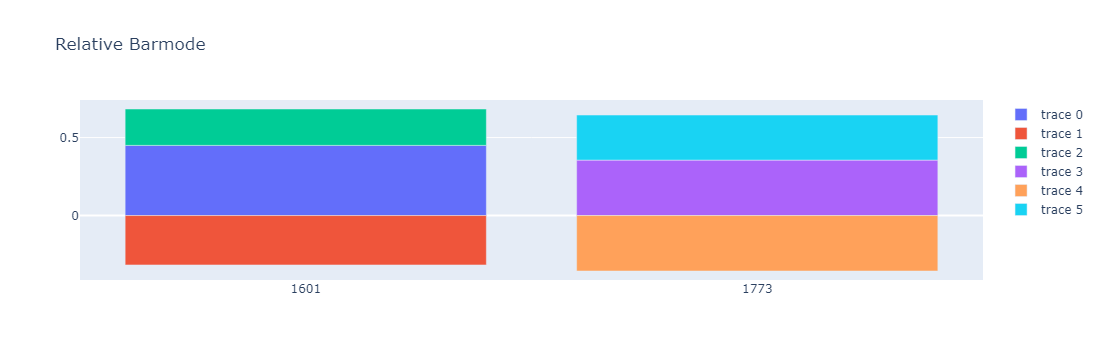

In [148]:
import plotly.graph_objects as go

trace1 = go.Bar(x=[str(x[0])], y=[y1[0]])
trace2 = go.Bar(x=[str(x[0])], y=[y2[0]])
trace3 = go.Bar(x=[str(x[0])], y=[y3[0]])

trace4 = go.Bar(x=[str(x[1])], y=[y1[1]])
trace5 = go.Bar(x=[str(x[1])], y=[y2[1]])
trace6 = go.Bar(x=[str(x[1])], y=[y3[1]])


traces = [trace1, trace2, trace3, trace4, trace5, trace6]

fig = go.Figure(traces)
fig.update_layout(barmode='relative', title_text='Relative Barmode')
fig.show()

In [807]:
player = pd.read_sql(""" SELECT * FROM match; """, conn)
player[:10]

KeyboardInterrupt: 